In [2]:
%cd /home/lcc/projects/MetaHarmonizer

/home/lcc/projects/MetaHarmonizer


/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import gevent.monkey

gevent.monkey.patch_all(thread=False, select=False)

True

In [3]:
import pandas as pd
from importlib import reload
from src.models import ontology_mapper_st as om_st
from src.Engine import ontology_mapping_engine as ome
import src.models.ontology_mapper_lm as om_lm
import src.models.ontology_mapper_rag_faiss as om_rag

reload(om_st)
reload(ome)
reload(om_lm)
reload(om_rag)

/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package punkt to /home/lcc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lcc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/lcc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lcc/nltk_data...
[nltk_data]   Package

<module 'src.models.ontology_mapper_rag_faiss' from '/home/lcc/projects/MetaHarmonizer/src/models/ontology_mapper_rag_faiss.py'>

In [4]:
from src.models.calc_stats import CalcStats

calc = CalcStats()

**Diseases**

In [5]:
# Updated code to pass the dict rather than a DataFrame
df = pd.read_csv('./data/corpus/cbio_disease/disease_query_for_NCIT:C3262.csv')

query_list = df['original_value'].tolist()
small_corpus_list = df['curated_ontology'].tolist()

cura_map = dict(zip(df['original_value'], df['curated_ontology']))

In [37]:
import pandas as pd

file_path = "data/corpus/cbio_disease/disease_query_for_NCIT:C3262.csv"
df = pd.read_csv(file_path, encoding='utf-8')

sample_df = df.sample(n=20, random_state=42)

sample_df.to_csv("random_20_samples.csv", index=False, encoding='utf-8')

In [44]:
df = pd.read_csv('random_20_samples.csv')

query_list = df['original_value'].tolist()
small_corpus_list = df['curated_ontology'].tolist()

cura_map = dict(zip(df['original_value'], df['curated_ontology']))

LM Strategy

In [6]:
# LM Strategy w/ SapBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='lm',
    **other_params)
lm_sapbert_result = onto_engine_large.run()

19/06//2025 11:28:1750357686 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
19/06//2025 11:28:1750357686 AM - INFO - OntoMapEngine: Running Ontology Mapping
19/06//2025 11:28:1750357686 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
19/06//2025 11:28:1750357686 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
19/06//2025 11:28:1750357686 AM - INFO - OntoMapLM: Initialized OntoMap Language Model module
19/06//2025 11:28:1750357686 AM - INFO - OntoMapLM.get_match_results: Creating embeddings for query_list and corpus
19/06//2025 11:28:1750357728 AM - INFO - OntoMapLM.get_match_results: Calculating cosine similarity matrix
19/06//2025 11:28:1750357728 AM - INFO - OntoMapLM.get_match_results: Generating results table
19/06//2025 11:28:1750357729 AM - INFO - OntoMapLM.get_match_results: Results Generated


In [7]:
lm_sapbert_accuracy_df = calc.calc_accuracy(lm_sapbert_result)
print(lm_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  81.519639
1  Top 3 Matches  89.826143
2  Top 5 Matches  92.530586


In [8]:
lm_sapbert_result.to_csv("lm_sapbert_result_disease.csv", index=False)

In [9]:
# Language Model Strategy w/ PubMedBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='lm',
    **other_params)

lm_pubmedbert_result = onto_engine_large.run()

17/06//2025 03:16:1750155401 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:16:1750155401 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:16:1750155401 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:16:1750155401 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:16:1750155401 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 03:16:1750155401 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 03:16:1750155401 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
17/06//2025 03:16:1750155401 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
17/06//2025 03:16:1750155401 AM - INFO - OntoMapLM: Initialized OntoMap Language Model module
17/06//2025 03:16:1750155401 AM - INFO - OntoMapLM.get_match_results: Creating embeddings for query_list and corpus
17/06//2025 03:17:1750155436 AM - INFO - OntoMapLM.get_mat

In [10]:
# Language Model Strategy w/ PubMedBERT
lm_pubmedbert_accuracy_df = calc.calc_accuracy(lm_pubmedbert_result)
print(lm_pubmedbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  76.497102
1  Top 3 Matches  87.443657
2  Top 5 Matches  89.568577


In [11]:
lm_pubmedbert_result.to_csv("lm_pubmedbert_result.csv", index=False)

ST Strategy (PubMedBERT‑MS‑MARCO, SapBERT-mean-token)

In [12]:
# ST Strategy w/ SapBERT-mean-token
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='mt-sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)
st_sapbert_result = onto_engine_large.run()

17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
17/06//2025 03:17:1750155460 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
17

No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.
No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.


17/06//2025 03:17:1750155465 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:17:1750155465 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:17:1750155465 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:17:1750155465 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:17:1750155467 AM - INFO - OntoMapST.get_match_results: Results Generated
17/06//2025 03:17:1750155467 AM - INFO - OntoMapST.get_match_results: Results Generated


In [14]:
st_sapbert_result.to_csv("st_sapbert_result.csv", index=False)

In [13]:
st_sapbert_accuracy_df = calc.calc_accuracy(st_sapbert_result)
print(st_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  80.811333
1  Top 3 Matches  89.954926
2  Top 5 Matches  92.981326


In [15]:
# st - pubmed-bert
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)

st_pubmetbert_result = onto_engine_large.run()

17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 03:19:1750155546 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 03:19:1750155546 AM

Exception in worker
Traceback (most recent call last):
  File "/home/lcc/miniconda3/envs/py310/lib/python3.10/concurrent/futures/thread.py", line 81, in _worker
    work_item = work_queue.get(block=True)
  File "src/gevent/queue.py", line 381, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 397, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 373, in gevent._gevent_cqueue.SimpleQueue._SimpleQueue__get_or_peek
  File "src/gevent/_waiter.py", line 154, in gevent._gevent_c_waiter.Waiter.get
  File "src/gevent/_greenlet_primitives.py", line 65, in gevent._gevent_c_greenlet_primitives.SwitchOutGreenletWithLoop.switch
  File "src/gevent/_gevent_c_greenlet_primitives.pxd", line 35, in gevent._gevent_c_greenlet_primitives._greenlet_switch
gevent.exceptions.LoopExit: This operation would block forever
	Hub: <Hub '' at 0x7fe8d2d0ae80 epoll pending=0 ref=0 fileno=96 thread_ident=0x7fe8d99ff640>
	Handles:
[]
Exception in worker
Traceback (mos

17/06//2025 03:19:1750155552 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:19:1750155552 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:19:1750155552 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:19:1750155552 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:19:1750155552 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:19:1750155552 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:19:1750155554 AM - INFO - OntoMapST.get_match_results: Results Generated
17/06//2025 03:19:1750155554 AM - INFO - OntoMapST.get_match_results: Results Generated
17/06//2025 03:19:1750155554 AM - INFO - OntoMapST.get_match_results: Results Generated


In [16]:
# Sentences Transformer Strategy w/ PubMedBERT
st_pubmedbert_accuracy_df = calc.calc_accuracy(st_pubmetbert_result)
print(st_pubmedbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  76.625885
1  Top 3 Matches  87.572440
2  Top 5 Matches  90.920798


In [17]:
st_pubmetbert_result.to_csv("st_pubmedbert_result.csv", index=False)

In [18]:
lm_sapbert_accuracy_df["Model"] = "LM + SapBERT"
lm_pubmedbert_accuracy_df["Model"] = "LM + PubMedBERT"
st_sapbert_accuracy_df["Model"] = "ST + SapBERT"
st_pubmedbert_accuracy_df["Model"] = "ST + PubMedBERT"

combined_df = pd.concat([
    lm_sapbert_accuracy_df,
    lm_pubmedbert_accuracy_df,
    st_sapbert_accuracy_df,
    st_pubmedbert_accuracy_df
], ignore_index=True)

pivot_df = combined_df.pivot(index="Accuracy Level", columns="Model", values="Accuracy")

In [19]:
pivot_df
pivot_df.to_csv("accuracy_comparison_disease.csv")

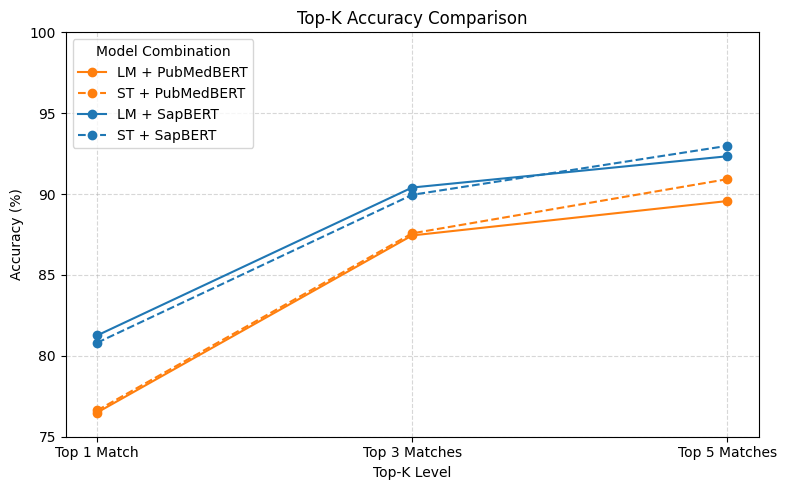

In [23]:
import matplotlib.pyplot as plt

for df, name in [
    (lm_sapbert_accuracy_df, ("SapBERT", "LM")),
    (lm_pubmedbert_accuracy_df, ("PubMedBERT", "LM")),
    (st_sapbert_accuracy_df, ("SapBERT", "ST")),
    (st_pubmedbert_accuracy_df, ("PubMedBERT", "ST")),
]:
    df["Model"] = name[0]
    df["Type"] = name[1]  # LM or ST

all_df = pd.concat([
    lm_sapbert_accuracy_df,
    lm_pubmedbert_accuracy_df,
    st_sapbert_accuracy_df,
    st_pubmedbert_accuracy_df
])

plt.figure(figsize=(8, 5))

model_palette = {
    "SapBERT": "#1f77b4",      
    "PubMedBERT": "#ff7f0e"    
}
linestyle_map = {
    "LM": "-",
    "ST": "--"
}

for (model, typ), subdf in all_df.groupby(["Model", "Type"]):
    plt.plot(
        subdf["Accuracy Level"],
        subdf["Accuracy"],
        label=f"{typ} + {model}",
        linestyle=linestyle_map[typ],
        color=model_palette[model],
        marker="o"
    )

plt.title("Top-K Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Top-K Level")
plt.ylim(75, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Model Combination")
plt.tight_layout()
plt.show()


RAG

In [83]:
# RAG Strategy w/ SapBERT
rag_engine = ome.OntoMapEngine(method='mt-sap-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_sapbert_result = rag_engine.run()

17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:48:1750229326 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//202

Processing queries: 100%|██████████| 1553/1553 [00:20<00:00, 73.99it/s]


17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:49:1750229348 PM - INFO - OntoMapRAG: Results Generated
17/06/

In [ ]:
rag_sapbert_result.to_csv("rag_sapbert_result_disease.csv",
                  index=False)

In [84]:
# RAG Strategy w/ SapBERT
rag_sapbert_accuracy_df = calc.calc_accuracy(rag_sapbert_result)
print(rag_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  52.350290
1  Top 3 Matches  75.917579
2  Top 5 Matches  83.258210


In [79]:
# RAG Strategy w/ pubmed-bert
rag_engine = ome.OntoMapEngine(method='pubmed-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_pubmed_result = rag_engine.run()

17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 11:21:1750227667 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//202

Processing queries: 100%|██████████| 1553/1553 [00:21<00:00, 71.28it/s]

17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 11:21:1750227689 PM - INFO - OntoMapRAG: Results Generated
17/06/

In [80]:
# RAG Strategy w/ pubmed-bert
rag_pubmed_accuracy_df = calc.calc_accuracy(rag_pubmed_result)
print(rag_pubmed_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  77.076626
1  Top 3 Matches  87.894398
2  Top 5 Matches  90.534449


In [81]:
rag_pubmed_result.to_csv("rag_pubmed_result_disease.csv",
                  index=False)

In [47]:
rag_pubmed_result

,original_value,curated_ontology,match_level,stage,top1_match,top1_score,top2_match,top2_score,top3_match,top3_score,top4_match,top4_score,top5_match,top5_score,top1_accuracy,top3_accuracy,top5_accuracy
0,ACUTE MEGAKARYOBLASTIC LEUKAEMIA,Acute Megakaryoblastic Leukemia,1,2,Acute Megakaryoblastic Leukemia,0.9421,Chondrosarcoma,0.8788,Small Cell Osteosarcoma,0.8747,Non-Hodgkin Lymphoma,0.8735,Cervical Endometrioid Adenocarcinoma,0.8701,True,True,True
1,ANAPLASTIC THYROID CANCER,Thyroid Gland Anaplastic Carcinoma,1,2,Thyroid Gland Anaplastic Carcinoma,0.9324,Thyroid Gland Carcinoma,0.9252,Thyroid Gland Sarcoma,0.9030,Papillary Carcinoma,0.8967,Head and Neck Basaloid Carcinoma,0.8848,True,True,True
2,"CARCINOMA, PAPILLARY",Papillary Carcinoma,1,2,Papillary Carcinoma,0.9604,Thyroid Gland Carcinoma,0.9264,Borderline Ovarian Clear Cell Tumor,0.9216,Head and Neck Basaloid Carcinoma,0.9174,Thyroid Gland Anaplastic Carcinoma,0.9137,True,True,True
3,CERVICAL ENDOMETRIOID CARCINOMA,Cervical Endometrioid Adenocarcinoma,1,2,Cervical Endometrioid Adenocarcinoma,0.9420,Ovarian High Grade Serous Adenocarcinoma,0.9020,Borderline Ovarian Clear Cell Tumor,0.8934,Chondrosarcoma,0.8820,Thyroid Gland Carcinoma,0.8796,True,True,True
4,CHONDROSARCOMA,Chondrosarcoma,1,2,Chondrosarcoma,0.9442,Small Cell Osteosarcoma,0.9014,Cervical Endometrioid Adenocarcinoma,0.8824,Sacrococcygeal Teratoma,0.8821,Thyroid Gland Sarcoma,0.8771,True,True,True
5,CLEAR CELL BORDERLINE OVARIAN TUMOR,Borderline Ovarian Clear Cell Tumor,1,2,Borderline Ovarian Clear Cell Tumor,0.9578,Papillary Carcinoma,0.9083,Ovarian High Grade Serous Adenocarcinoma,0.9018,Cervical Endometrioid Adenocarcinoma,0.8922,Thyroid Gland Carcinoma,0.8847,True,True,True
6,GASTROINTESTINAL NEUROENDOCRINE,Digestive System Neuroendocrine Tumor,1,2,Digestive System Neuroendocrine Tumor,0.9250,Neuroendocrine Neoplasm,0.9055,Primitive Neuroectodermal Tumor,0.8667,Hilar Cholangiocarcinoma,0.8628,Thyroid Gland Carcinoma,0.8527,True,True,True
7,HEAD & NECK SQUAMOUS CELL CARCINOMA BASALOID TYPE,Head and Neck Basaloid Carcinoma,1,2,Head and Neck Basaloid Carcinoma,0.9586,Thyroid Gland Carcinoma,0.9154,Thyroid Gland Anaplastic Carcinoma,0.9136,Papillary Carcinoma,0.9078,Ovarian High Grade Serous Adenocarcinoma,0.9007,True,True,True
8,HGS,Ovarian High Grade Serous Adenocarcinoma,1,2,Ovarian High Grade Serous Adenocarcinoma,0.8795,Non-Hodgkin Lymphoma,0.8710,Cervical Endometrioid Adenocarcinoma,0.8590,Hilar Cholangiocarcinoma,0.8583,Chondrosarcoma,0.8570,True,True,True
9,MALIGNANT SACROCOCCYGEAL TERATOMA,Sacrococcygeal Teratoma,1,2,Sacrococcygeal Teratoma,0.9432,Chondrosarcoma,0.9038,Ovarian High Grade Serous Adenocarcinoma,0.8897,Primitive Neuroectodermal Tumor,0.8859,Thyroid Gland Sarcoma,0.8844,True,True,True


Overlapping of different strategies

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def compute_overlap_matrix(data_dict):
    methods = list(data_dict.keys())
    matrix = pd.DataFrame(index=methods, columns=methods)

    for m1 in methods:
        for m2 in methods:
            if m1 == m2:
                matrix.loc[m1, m2] = 1.0
            else:
                intersect = len(data_dict[m1] & data_dict[m2])
                union = len(data_dict[m1] | data_dict[m2])
                matrix.loc[m1, m2] = round(intersect / union, 3)
    return matrix


def plot_heatmap(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix.astype(float),
                annot=True,
                fmt=".2f",
                cmap="Blues",
                linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [87]:
files = {
    'sapbert_lm':
    'lm_sapbert_result.csv',
    'sapbert_st':
    'st_sapbert_result.csv',
    'sapbert_rag':
    'rag_sapbert_result.csv',
    'pubmed_lm':
    'lm_pubmedbert_result.csv',
    'pubmed_st':
    'st_pubmedbert_result.csv',
    'pubmed_rag':
    'rag_pubmed_result_disease.csv',
}

top1_dict = {}
top5_dict = {}

for name, path in files.items():
    df = pd.read_csv(path)
    top1_dict[name] = set(df[df['match_level'] == 1]['original_value'])
    top5_dict[name] = set(df[df['match_level'] <= 5]['original_value'])

top1_overlap = compute_overlap_matrix(top1_dict)
top5_overlap = compute_overlap_matrix(top5_dict)

print("🔹 Top1 Jaccard Overlap Matrix")
print(top1_overlap)

print("\n🔹 Top5 Jaccard Overlap Matrix")
print(top5_overlap)

🔹 Top1 Jaccard Overlap Matrix
            sapbert_lm sapbert_st sapbert_rag pubmed_lm pubmed_st pubmed_rag
sapbert_lm         1.0      0.911       0.573     0.842     0.844      0.817
sapbert_st       0.911        1.0       0.562     0.858     0.862      0.816
sapbert_rag      0.573      0.562         1.0     0.543     0.545       0.58
pubmed_lm        0.842      0.858       0.543       1.0     0.949      0.818
pubmed_st        0.844      0.862       0.545     0.949       1.0      0.818
pubmed_rag       0.817      0.816        0.58     0.818     0.818        1.0

🔹 Top5 Jaccard Overlap Matrix
            sapbert_lm sapbert_st sapbert_rag pubmed_lm pubmed_st pubmed_rag
sapbert_lm         1.0      0.966       0.833     0.939     0.941      0.914
sapbert_st       0.966        1.0       0.825      0.94     0.949      0.918
sapbert_rag      0.833      0.825         1.0      0.82     0.822      0.839
pubmed_lm        0.939       0.94        0.82       1.0     0.975      0.912
pubmed_st      

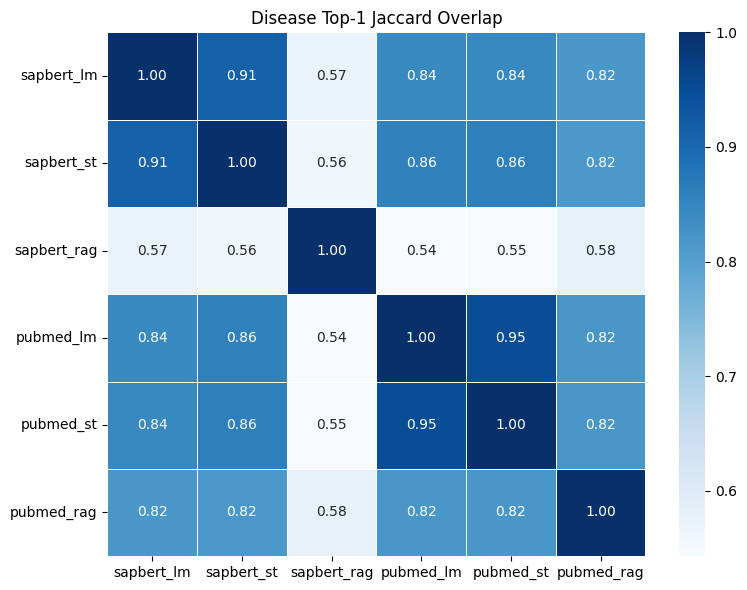

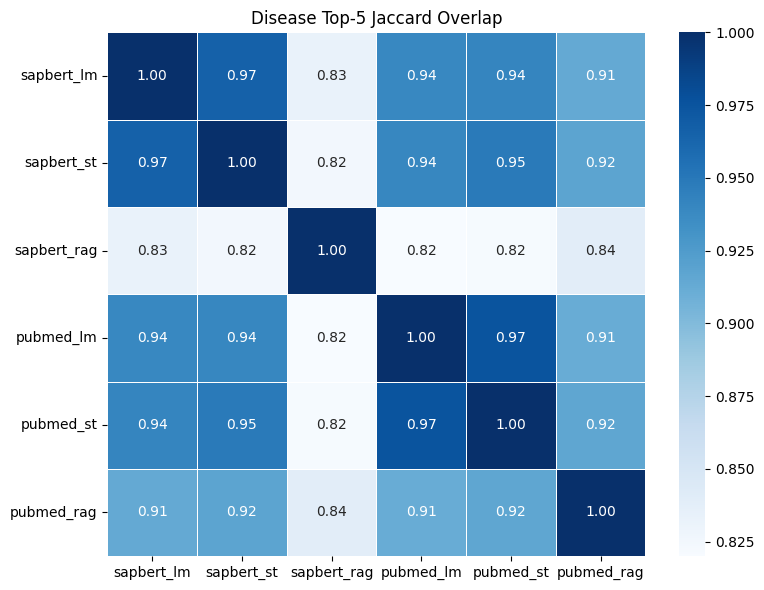

In [88]:
plot_heatmap(top1_overlap, "Disease Top-1 Jaccard Overlap")
plot_heatmap(top5_overlap, "Disease Top-5 Jaccard Overlap")

Sample

In [28]:
import sqlite3

conn = sqlite3.connect('src/KnowledgeDb/vector_db.sqlite')
cursor = conn.cursor()

cursor.execute("SELECT MAX(LENGTH(context)) FROM mt_sap_bert_term_info;")
max_len = cursor.fetchone()[0]

print("Max length of 'context' column:", max_len)

conn.close()

Max length of 'context' column: 6898


In [36]:
import sqlite3
import csv

conn = sqlite3.connect('src/KnowledgeDb/version1/vector_db.sqlite')
cursor = conn.cursor()

cursor.execute("""
    SELECT * FROM mt_sap_bert_term_info
    WHERE LENGTH(context) > 2200;
""")

rows = cursor.fetchall()

print(
    f"✅ Exported {len(rows)} rows with long contexts."
)

conn.close()


✅ Exported 1 rows with long contexts.


**Treatment**

In [9]:
# Updated code to pass the dict rather than a DataFrame
df = pd.read_csv(
    './data/corpus/cbio_treatment_name/trt_name_query_for_NCIT:C1909.csv')

query_list = df['original_value'].tolist()
small_corpus_list = df['curated_ontology'].tolist()

cura_map = dict(zip(df['original_value'], df['curated_ontology']))

LM Strategy (SapBERT)

In [10]:
# LM Strategy w/ SapBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='lm',
    **other_params)
lm_sapbert_result = onto_engine_large.run()

19/06//2025 11:30:1750357825 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
19/06//2025 11:30:1750357825 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
19/06//2025 11:30:1750357825 AM - INFO - OntoMapEngine: Running Ontology Mapping
19/06//2025 11:30:1750357825 AM - INFO - OntoMapEngine: Running Ontology Mapping
19/06//2025 11:30:1750357825 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
19/06//2025 11:30:1750357825 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
19/06//2025 11:30:1750357825 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
19/06//2025 11:30:1750357825 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
19/06//2025 11:30:1750357825 AM - INFO - OntoMapLM: Initialized OntoMap Language Model module
19/06//2025 11:30:1750357825 AM - INFO - OntoMapLM: Initialized OntoMap Language Model module
19/06//2025 11:30:1750357825 AM - INFO - OntoMapLM.get_match_results: Creating e

In [11]:
lm_sapbert_accuracy_df = calc.calc_accuracy(lm_sapbert_result)
print(lm_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  74.221453
1  Top 3 Matches  79.930796
2  Top 5 Matches  81.314879


In [12]:
lm_sapbert_result.to_csv("lm_sapbert_result_trt.csv", index=False)

In [28]:
# Language Model Strategy w/ PubMedBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='lm',
    **other_params)

lm_pubmedbert_result = onto_engine_large.run()

17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156501 AM - INFO - OntoMapEngine:

In [29]:
# Language Model Strategy w/ PubMedBERT
lm_pubmedbert_accuracy_df = calc.calc_accuracy(lm_pubmedbert_result)
print(lm_pubmedbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  67.647059
1  Top 3 Matches  72.318339
2  Top 5 Matches  73.183391


In [30]:
lm_pubmedbert_result.to_csv("lm_pubmedbert_result_trt.csv", index=False)

ST Strategy (PubMedBERT‑MS‑MARCO, SapBERT-mean-token)

In [31]:
# ST Strategy w/ SapBERT-mean-token
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='mt-sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)
st_sapbert_result = onto_engine_large.run()

17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module


17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:35:1750156536 AM - INFO - OntoMapEngine: Running 

No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.
No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.


17/06//2025 03:35:1750156540 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:35:1750156540 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:35:1750156540 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:35:1750156540 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:35:1750156540 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:35:1750156540 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:35:1750156540 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:35:1750156540 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:35:1750156540 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:35:1750156540 AM - INFO - OntoMapST.get_match_results: Generating resu

In [32]:
st_sapbert_result.to_csv("st_sapbert_result_trt.csv", index=False)

In [33]:
st_sapbert_accuracy_df = calc.calc_accuracy(st_sapbert_result)
print(st_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  73.356401
1  Top 3 Matches  79.757785
2  Top 5 Matches  81.141869


In [34]:
# st - pubmed-bert
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)

st_pubmetbert_result = onto_engine_large.run()

17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:36:1750156562 AM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 03:36:1750156562 AM - INF

Exception in worker
Traceback (most recent call last):
  File "/home/lcc/miniconda3/envs/py310/lib/python3.10/concurrent/futures/thread.py", line 81, in _worker
    work_item = work_queue.get(block=True)
  File "src/gevent/queue.py", line 381, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 397, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 373, in gevent._gevent_cqueue.SimpleQueue._SimpleQueue__get_or_peek
  File "src/gevent/_waiter.py", line 154, in gevent._gevent_c_waiter.Waiter.get
  File "src/gevent/_greenlet_primitives.py", line 65, in gevent._gevent_c_greenlet_primitives.SwitchOutGreenletWithLoop.switch
  File "src/gevent/_gevent_c_greenlet_primitives.pxd", line 35, in gevent._gevent_c_greenlet_primitives._greenlet_switch
gevent.exceptions.LoopExit: This operation would block forever
	Hub: <Hub '' at 0x7fe849ddeb10 epoll pending=0 ref=0 fileno=124 thread_ident=0x7fe84a5ff640>
	Handles:
[]
Exception in worker
Traceback (mo

17/06//2025 03:36:1750156567 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:36:1750156567 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:36:1750156567 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:36:1750156567 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:36:1750156567 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:36:1750156567 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 03:36:1750156567 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:36:1750156567 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:36:1750156567 AM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 03:36:1750156567 AM - INFO - OntoMapST.get_match_results: Gen

In [35]:
# Sentences Transformer Strategy w/ PubMedBERT
st_pubmedbert_accuracy_df = calc.calc_accuracy(st_pubmetbert_result)
print(st_pubmedbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  67.820069
1  Top 3 Matches  71.972318
2  Top 5 Matches  73.702422


In [36]:
st_pubmetbert_result.to_csv("st_pubmedbert_result_trt.csv", index=False)

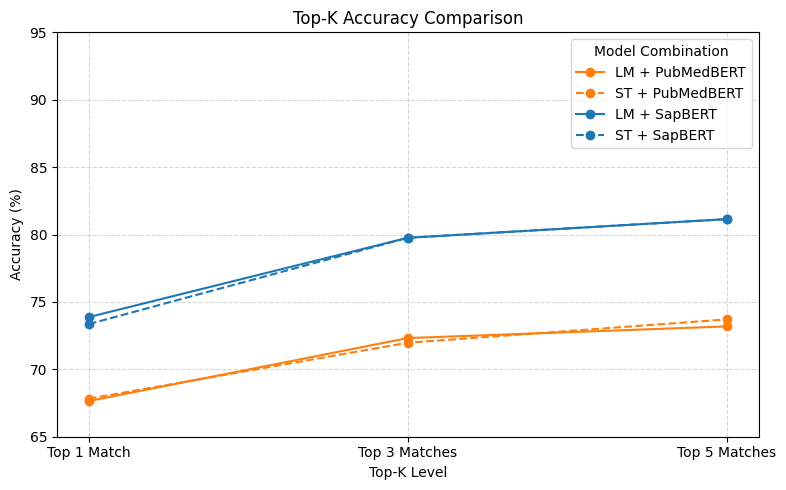

In [38]:
for df, name in [
    (lm_sapbert_accuracy_df, ("SapBERT", "LM")),
    (lm_pubmedbert_accuracy_df, ("PubMedBERT", "LM")),
    (st_sapbert_accuracy_df, ("SapBERT", "ST")),
    (st_pubmedbert_accuracy_df, ("PubMedBERT", "ST")),
]:
    df["Model"] = name[0]
    df["Type"] = name[1]  # LM or ST

all_df = pd.concat([
    lm_sapbert_accuracy_df,
    lm_pubmedbert_accuracy_df,
    st_sapbert_accuracy_df,
    st_pubmedbert_accuracy_df
])

plt.figure(figsize=(8, 5))

model_palette = {
    "SapBERT": "#1f77b4",      
    "PubMedBERT": "#ff7f0e"    
}
linestyle_map = {
    "LM": "-",
    "ST": "--"
}

for (model, typ), subdf in all_df.groupby(["Model", "Type"]):
    plt.plot(
        subdf["Accuracy Level"],
        subdf["Accuracy"],
        label=f"{typ} + {model}",
        linestyle=linestyle_map[typ],
        color=model_palette[model],
        marker="o"
    )

plt.title("Top-K Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Top-K Level")
plt.ylim(65, 95)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Model Combination")
plt.tight_layout()
plt.show()

RAG

In [58]:
# RAG Strategy w/ SapBERT
rag_engine = ome.OntoMapEngine(method='mt-sap-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_sapbert_result = rag_engine.run()

17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:11:1750223486 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//202

Processing queries: 100%|██████████| 436/436 [00:05<00:00, 75.87it/s]


17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:11:1750223492 PM - INFO - OntoMapRAG: Results Generated


In [24]:
rag_sapbert_result.to_csv("rag_sapbert_result_trt.csv",
                  index=False)

In [59]:
# RAG Strategy w/ SapBERT
rag_sapbert_accuracy_df = calc.calc_accuracy(rag_sapbert_result)
print(rag_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  66.435986
1  Top 3 Matches  79.065744
2  Top 5 Matches  82.352941


In [70]:
# RAG Strategy w/ pubmed-bert
rag_engine = ome.OntoMapEngine(method='pubmed-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_pubmed_result = rag_engine.run()

17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module


17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 10:27:1750224458 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 10:27:1750224458 PM - INF

Processing queries: 100%|██████████| 436/436 [00:05<00:00, 73.72it/s]

17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:27:1750224464 PM - INFO - OntoMapRAG: Results Generated
17/06/

In [72]:
rag_pubmed_result.to_csv("rag_pubmed_result_trt.csv",
                         index=False)

In [71]:
# RAG Strategy w/ pubmed-bert
rag_pubmed_accuracy_df = calc.calc_accuracy(rag_pubmed_result)
print(rag_pubmed_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  71.799308
1  Top 3 Matches  81.141869
2  Top 5 Matches  83.910035


Comparison

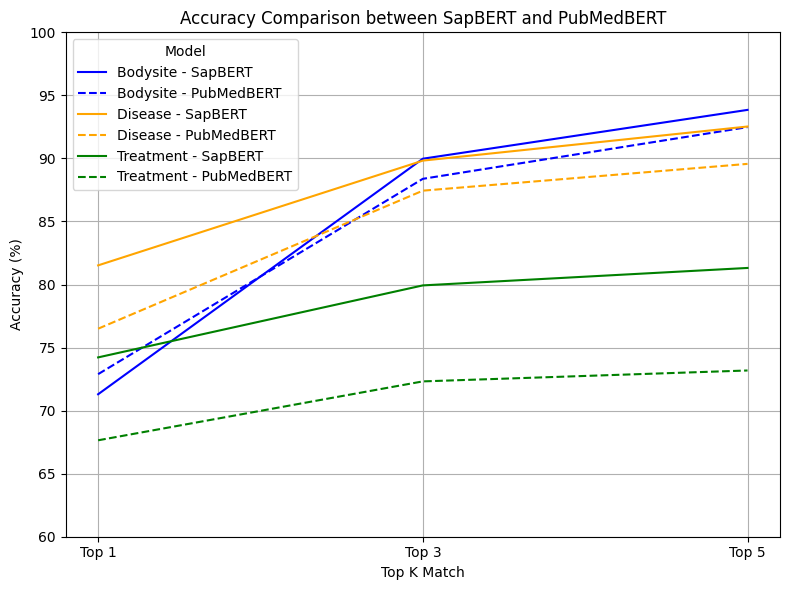

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"data/outputs/Comparison.xlsx"
df = pd.read_excel(file_path)

df["model"] = df["model"].str.replace("–", "-", regex=False)  # en dash
df["model"] = df["model"].str.replace("‑", "-",
                                      regex=False)  # non-breaking hyphen

categories = df["category"].unique()
topks = ["Top 1", "Top 3", "Top 5"]
colors = {"bodysite": "blue", "disease": "orange", "treatment": "green"}
linestyles = {"SapBERT": "solid", "PubMedBERT-MS-MARCO": "dashed"}

plt.figure(figsize=(8, 6))

for cat in categories:
    df_sapbert = df[(df["category"] == cat) & (df["model"] == "SapBERT")]
    if not df_sapbert.empty:
        mean_accuracy = df_sapbert[topks].mean()
        label = f"{cat.capitalize()} - SapBERT"
        plt.plot(topks,
                 mean_accuracy,
                 label=label,
                 color=colors[cat],
                 linestyle=linestyles["SapBERT"])

    df_pubmed_mean = df[(df["category"] == cat)
                        & (df["model"] == "PubMedBERT-MS-MARCO") &
                        (df["pooling strategy"] == "lm")]
    if not df_pubmed_mean.empty:
        mean_accuracy = df_pubmed_mean[topks].mean()
        label = f"{cat.capitalize()} - PubMedBERT"
        plt.plot(topks,
                 mean_accuracy,
                 label=label,
                 color=colors[cat],
                 linestyle=linestyles["PubMedBERT-MS-MARCO"])

plt.title("Accuracy Comparison between SapBERT and PubMedBERT")
plt.xlabel("Top K Match")
plt.ylabel("Accuracy (%)")
plt.ylim(60, 100)
plt.grid(True)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

In [25]:
!curl "https://api-evsrest.nci.nih.gov/api/v1/metadata/ncit/roles"



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[{"code":"R100","name":"Disease_Has_Associated_Anatomic_Site","terminology":"ncit","version":"25.05d"},{"code":"R101","name":"Disease_Has_Primary_Anatomic_Site","terminology":"ncit","version":"25.05d"},{"code":"R102","name":"Disease_Has_Metastatic_Anatomic_Site","terminology":"ncit","version":"25.05d"},{"code":"R103","name":"Disease_Has_Normal_Tissue_Origin","terminology":"ncit","version":"25.05d"},{"code":"R104","name":"Disease_Has_Normal_Cell_Origin","terminology":"ncit","version":"25.05d"},{"code":"R105","name":"Disease_Has_Abnormal_Cell","terminology":"ncit","version":"25.05d"},{"code":"R106","name":"Disease_Has_Molecular_Abnormality","terminology":"ncit","version":"25.05d"},{"code":"R107","name":"Disease_Has_Cytogenetic_Abnormality","terminology":"ncit","version":"25.05d"},{"code":"R108","name":"Disease_Has_Finding","terminology":"ncit","version":"25.05d"},{"code":"R110","name":"Disease_Is_Grade","terminology":"ncit","version":"25.05d"},{"code":"R111","name":"Disease_May_Have_Norm

In [ ]:
import requests
import pandas as pd

url = "https://api-evsrest.nci.nih.gov/api/v1/metadata/ncit/roles"
response = requests.get(url)
roles = response.json()

df = pd.DataFrame(roles)
df.to_csv("ncit_roles.csv", index=False)
print(df.head())

   code                                  name terminology version
0  R100  Disease_Has_Associated_Anatomic_Site        ncit  25.05d
1  R101     Disease_Has_Primary_Anatomic_Site        ncit  25.05d
2  R102  Disease_Has_Metastatic_Anatomic_Site        ncit  25.05d
3  R103      Disease_Has_Normal_Tissue_Origin        ncit  25.05d
4  R104        Disease_Has_Normal_Cell_Origin        ncit  25.05d


Bodysite

In [60]:
df = pd.read_csv(
    './data/corpus/cbio_body_site/body_site_query_for_NCIT:C32221.csv')

query_list = df['original_value'].tolist()
small_corpus_list = df['curated_ontology'].tolist()

cura_map = dict(zip(df['original_value'], df['curated_ontology']))

In [64]:
# RAG Strategy w/ sap-bert
rag_engine = ome.OntoMapEngine(method='mt-sap-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_sapbert_result = rag_engine.run()

17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 10:15:1750223752 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//202

Processing queries: 100%|██████████| 439/439 [00:05<00:00, 79.32it/s]

17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 10:15:1750223758 PM - INFO - OntoMapRAG: Results Generated
17/06/

In [74]:
rag_sapbert_result.to_csv("rag_sapbert_result_bodysite.csv",
                  index=False)

In [65]:
rag_sapbert_accuracy_df = calc.calc_accuracy(rag_sapbert_result)
print(rag_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  66.970387
1  Top 3 Matches  86.560364
2  Top 5 Matches  90.660592


In [47]:
# RAG Strategy w/ pubmed-bert
rag_engine = ome.OntoMapEngine(method='pubmed-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_pubmed_result = rag_engine.run()

17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 05:58:1750208291 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 05:58:1

Processing queries: 100%|██████████| 439/439 [00:07<00:00, 58.89it/s]

17/06//2025 05:58:1750208298 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 05:58:1750208298 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 05:58:1750208298 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 05:58:1750208298 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 05:58:1750208298 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 05:58:1750208298 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 05:58:1750208298 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 05:58:1750208298 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 05:58:1750208298 PM - INFO - OntoMapRAG: Results Generated
17/06//2025 05:58:1750208298 PM - INFO - OntoMapRAG: Results Generated


In [49]:
rag_pubmed_result.to_csv("rag_pubmed_result_bodysite.csv",
                  index=False)

In [48]:
rag_pubmed_accuracy_df = calc.calc_accuracy(rag_pubmed_result)
print(rag_pubmed_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  71.298405
1  Top 3 Matches  88.838269
2  Top 5 Matches  93.394077


Overlapping of different strategies

In [89]:
files = {
    'sapbert_lm':
    'lm_sapbert_result_trt.csv',
    'sapbert_st':
    'st_sapbert_result_trt.csv',
    'sapbert_rag':
    'rag_sapbert_result_trt.csv',
    'pubmed_lm':
    'lm_pubmedbert_result_trt.csv',
    'pubmed_st':
    'st_pubmedbert_result_trt.csv',
    'pubmed_rag':
    'rag_pubmed_result_trt.csv',
}

top1_dict = {}
top5_dict = {}

for name, path in files.items():
    df = pd.read_csv(path)
    top1_dict[name] = set(df[df['match_level'] == 1]['original_value'])
    top5_dict[name] = set(df[df['match_level'] <= 5]['original_value'])

top1_overlap = compute_overlap_matrix(top1_dict)
top5_overlap = compute_overlap_matrix(top5_dict)

print("🔹 Top1 Jaccard Overlap Matrix")
print(top1_overlap)

print("\n🔹 Top5 Jaccard Overlap Matrix")
print(top5_overlap)

🔹 Top1 Jaccard Overlap Matrix
            sapbert_lm sapbert_st sapbert_rag pubmed_lm pubmed_st pubmed_rag
sapbert_lm         1.0      0.934       0.718     0.834     0.824      0.784
sapbert_st       0.934        1.0       0.715     0.836     0.826      0.778
sapbert_rag      0.718      0.715         1.0     0.653     0.648      0.744
pubmed_lm        0.834      0.836       0.653       1.0     0.977      0.811
pubmed_st        0.824      0.826       0.648     0.977       1.0      0.805
pubmed_rag       0.784      0.778       0.744     0.811     0.805        1.0

🔹 Top5 Jaccard Overlap Matrix
            sapbert_lm sapbert_st sapbert_rag pubmed_lm pubmed_st pubmed_rag
sapbert_lm         1.0      0.962       0.786     0.866     0.865      0.838
sapbert_st       0.962        1.0       0.786     0.866     0.868      0.835
sapbert_rag      0.786      0.786         1.0     0.695     0.698      0.826
pubmed_lm        0.866      0.866       0.695       1.0     0.974      0.809
pubmed_st      

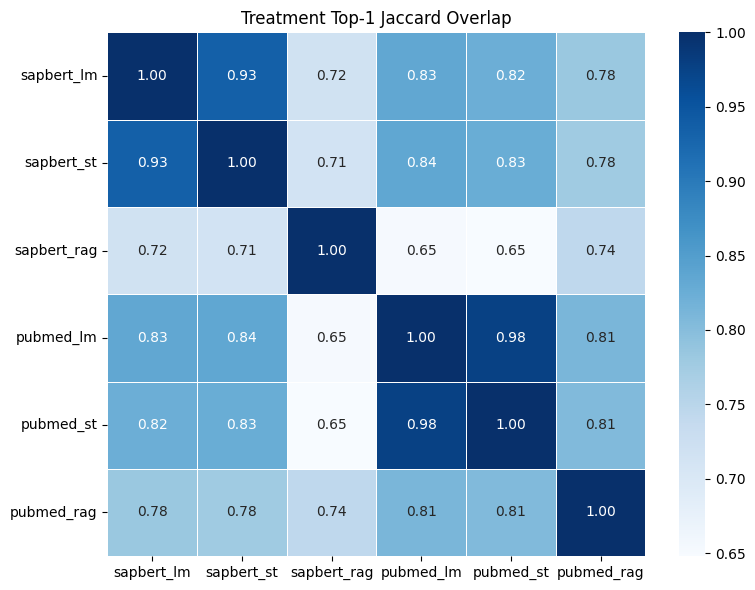

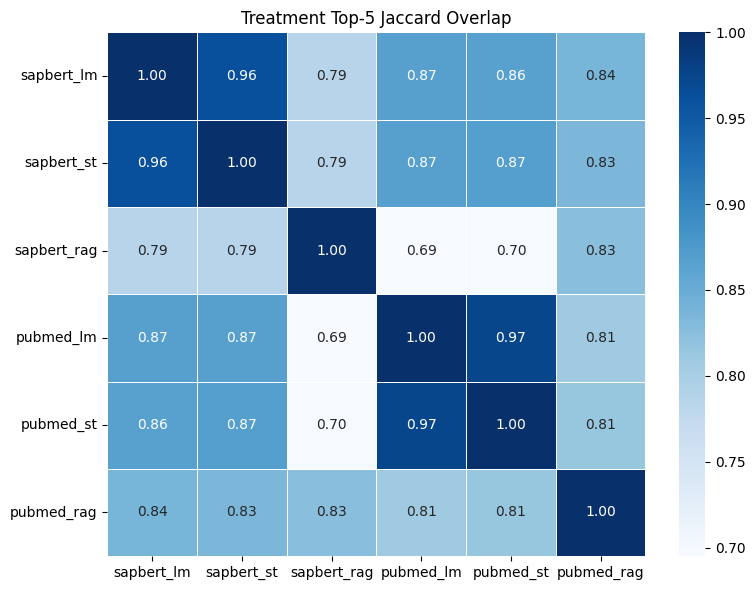

In [90]:
plot_heatmap(top1_overlap, "Treatment Top-1 Jaccard Overlap")
plot_heatmap(top5_overlap, "Treatment Top-5 Jaccard Overlap")